In [24]:
# Import modules
import numpy as np # linear algebra
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [3]:
# Loading the Library and examing the data 
titanic = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv') 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

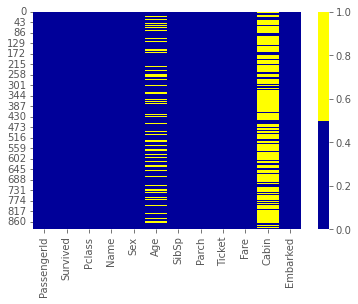

In [25]:

cols = titanic.columns # first 30 columns
colours = ['#000099', '#ffff00']

# specify the colours - yellow is missing. blue is not missing.

sns.heatmap(titanic[cols].isnull(), cmap=sns.color_palette(colours))

In [26]:
# Missing Data Percentage List
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in titanic.columns:
    pct_missing = np.mean(titanic[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PassengerId - 0%
Survived - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 20%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%


In [28]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

created missing indicator for: Age
created missing indicator for: Cabin
created missing indicator for: Embarked


<AxesSubplot:xlabel='index'>

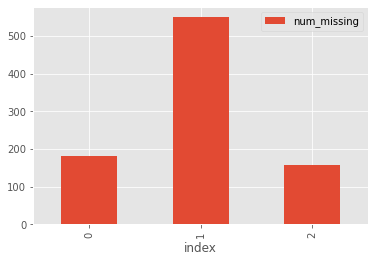

In [29]:
# Missing Data Histogram
# first create missing indicator for features with missing data
for col in titanic.columns:
    missing = titanic[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        titanic['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in titanic.columns if 'ismissing' in col]
titanic['num_missing'] = titanic[ismissing_cols].sum(axis=1)

titanic['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [32]:
# Exploratory Data Analysis 
print('Total number of passangers in the training data...', len(titanic))
print('Number of passangers in the training data who survived...', len(titanic[titanic['Survived'] == 1]))
print('Number of passangers in the training data who did NOT survive...',  len(titanic[titanic['Survived'] == 0]))

Total number of passangers in the training data... 891
Number of passangers in the training data who survived... 342
Number of passangers in the training data who did NOT survive... 549


In [50]:
print('% of men who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'female']))

print('% of survival based on 1st class ', 100*np.mean(titanic['Survived'][titanic['Pclass']  == 1]))
print('% of survival based on 2nd class ', 100*np.mean(titanic['Survived'][titanic['Pclass']  == 2]))
print('% of survival based on 3rd class ', 100*np.mean(titanic['Survived'][titanic['Pclass']  == 3]))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095
% of survival based on 1st class  62.96296296296296
% of survival based on 2nd class  47.28260869565217
% of survival based on 3rd class  24.236252545824847


In [51]:
print('% of children who survived', 100*np.mean(titanic['Survived'][titanic['Age'] < 18]))
print('% of adult who survived', 100*np.mean(titanic['Survived'][titanic['Age'] > 18]))

% of children who survived 53.98230088495575
% of adult who survived 38.26086956521739


In [60]:
len(titanic[titanic['Survived'] ==1][titanic['Age'] < 18])

C:\Users\Tunji\AppData\Local\Temp/ipykernel_9084/2964679734.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(titanic[titanic['Survived'] ==1][titanic['Age'] < 18])


61

In [61]:
# Data Preprocessing
#Non numeric features to numeric
#We are going to use a decision tree model. The model requires only numeric values, 
#but one of our features is categorical: "female" or "male". this can easily be fixed by encoding this feature: "male" = 1, "female" = 0


titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [62]:
# Missing Value with mean(average value)
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))

In [63]:
# Looking at frequency of each values in 'Embarked'
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
# We can use fillna() function to fill the missing values (Value filled by finding the most common variable(mode))
titanic.Embarked.fillna(value='S', axis = 0, inplace = True) #rowwise input

In [65]:
titanic.isnull().sum()

PassengerId             0
Survived                0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                0
Age_ismissing           0
Cabin_ismissing         0
Embarked_ismissing      0
num_missing             0
dtype: int64

In [66]:
# Omit irrelevant columns


titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]



In [67]:
#Separating input variables (X) and target variable (y)

X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [68]:
# Train Test and Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [69]:
# Building an ML MODEl (Decision tree)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
# Evaluate your Model
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9859550561797753
Test accuracy 0.7988826815642458


In [71]:
from sklearn.tree import export_graphviz
import graphviz

In [72]:
dot_data= export_graphviz(model, out_file=None, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True) 

In [73]:
graph1=graphviz.Source(dot_data)

In [ ]:
graph1

In [75]:
# Improve the model
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [76]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))



train score... 0.8384831460674157
test score... 0.7988826815642458


In [ ]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True)

In [ ]:


graph2=graphviz.Source(dot_data)



In [ ]:
graph2